In [2]:
import numpy as np
from tabulate import tabulate
from matplotlib import cm  # Add import for colormap
import matplotlib.pyplot as plt
import networkx as nx



# uniform action 

In [3]:
# Initialize parameters
alphabet = ['A', 'B', 'C']
n_timesteps = 5  # t=0 to t=4

# Function to get all possible next states given current sequence
def get_next_states(curr_seq):
    next_states = []
    
    # Insertions - can insert at any position including start and end
    for pos in range(len(curr_seq) + 1):
        for char in alphabet:
            new_seq = curr_seq[:pos] + char + curr_seq[pos:]
            next_states.append(new_seq)
    
    # Deletions - can delete any existing character
    if curr_seq:  # only if sequence is not empty
        for pos in range(len(curr_seq)):
            new_seq = curr_seq[:pos] + curr_seq[pos+1:]
            next_states.append(new_seq)
    
    # Mutations - can change any existing character
    for pos in range(len(curr_seq)):
        for char in alphabet:
            new_seq = curr_seq[:pos] + char + curr_seq[pos+1:]
            next_states.append(new_seq)
            
    return next_states

# Generate one random trajectory
trajectory = ['']  # Start with empty sequence
# np.random.seed(42)  # For reproducibility

for t in range(n_timesteps-1):
    curr_seq = trajectory[-1]
    next_states = get_next_states(curr_seq)
    # Randomly select next state with equal probability
    next_seq = np.random.choice(next_states)
    trajectory.append(next_seq)

print("One possible trajectory:")
for t, seq in enumerate(trajectory):
    print(f"t={t}: '{seq if seq else 'empty'}'")


One possible trajectory:
t=0: 'empty'
t=1: 'C'
t=2: 'BC'
t=3: 'CBC'
t=4: 'CBBC'


In [4]:
get_next_states('')

['A', 'B', 'C']

In [5]:
get_next_states('A')

['AA', 'BA', 'CA', 'AA', 'AB', 'AC', '', 'A', 'B', 'C']

In [6]:
get_next_states('AB')

['AAB',
 'BAB',
 'CAB',
 'AAB',
 'ABB',
 'ACB',
 'ABA',
 'ABB',
 'ABC',
 'B',
 'A',
 'AB',
 'BB',
 'CB',
 'AA',
 'AB',
 'AC']

# non-uniform action (TODO: maybe later)


In [7]:
# Define action probabilities
action_probs = {
    'insert': 0.2,
    'delete': 0.3, 
    'mutate': 0.5
}

# Define character probabilities for insertion
insertion_char_probs = {
    'A': 0.5,
    'B': 0.4, 
    'C': 0.1
}

# Define mutation probabilities for each starting character
mutation_probs = {
    'A': {'A': 0.6, 'B': 0.2, 'C': 0.2},
    'B': {'A': 0.1, 'B': 0.8, 'C': 0.1}, 
    'C': {'A': 0.1, 'B': 0.1, 'C': 0.8}
}


print("Action 1 - Initial action probabilities:")
for action, prob in action_probs.items():
    print(f"{action}: {prob}")

print("\nAction 2 - After choosing an action:")
print("\nIf INSERT was chosen:")
print("Position selection: Uniform probability across all possible positions")
print("Then character probabilities:")
for char, prob in insertion_char_probs.items():
    print(f"Insert {char}: {prob}")

print("\nIf DELETE was chosen:")
print("Position selection: Uniform probability across all existing positions")

print("\nIf MUTATE was chosen:")
print("Position selection: Uniform probability across all existing positions")
print("Then mutation probabilities:")
for start_char, probs in mutation_probs.items():
    print(f"\nIf position contains {start_char}:")
    for end_char, prob in probs.items():
        print(f"{start_char}->{end_char}: {prob}")


Action 1 - Initial action probabilities:
insert: 0.2
delete: 0.3
mutate: 0.5

Action 2 - After choosing an action:

If INSERT was chosen:
Position selection: Uniform probability across all possible positions
Then character probabilities:
Insert A: 0.5
Insert B: 0.4
Insert C: 0.1

If DELETE was chosen:
Position selection: Uniform probability across all existing positions

If MUTATE was chosen:
Position selection: Uniform probability across all existing positions
Then mutation probabilities:

If position contains A:
A->A: 0.6
A->B: 0.2
A->C: 0.2

If position contains B:
B->A: 0.1
B->B: 0.8
B->C: 0.1

If position contains C:
C->A: 0.1
C->B: 0.1
C->C: 0.8



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

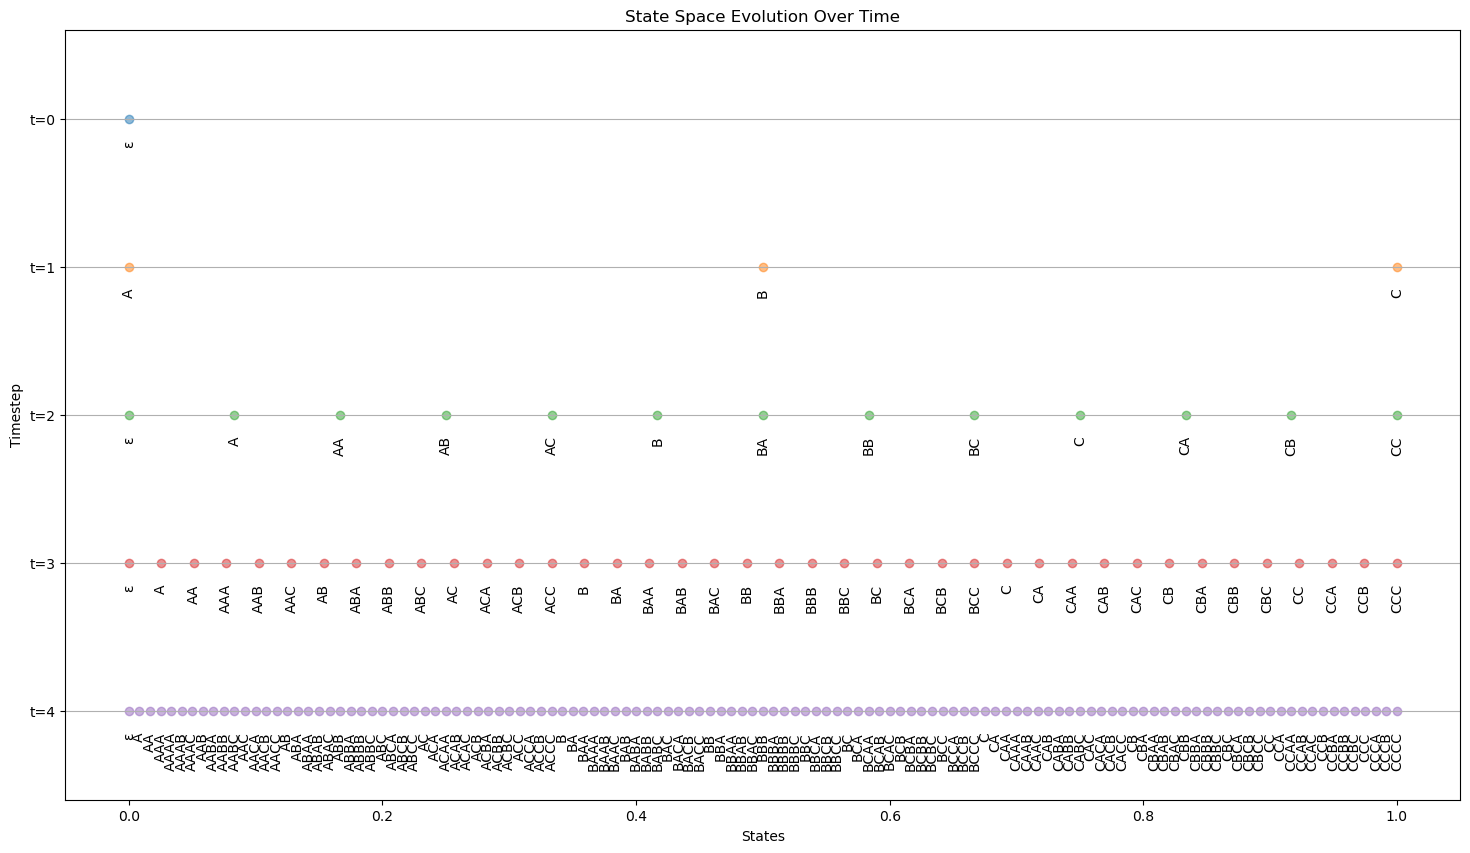

In [7]:
# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top')

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('State Space Evolution Over Time')
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])


Number of paths to ABC: 108
Number of paths to CBA: 108
Number of paths to CCCA: 24


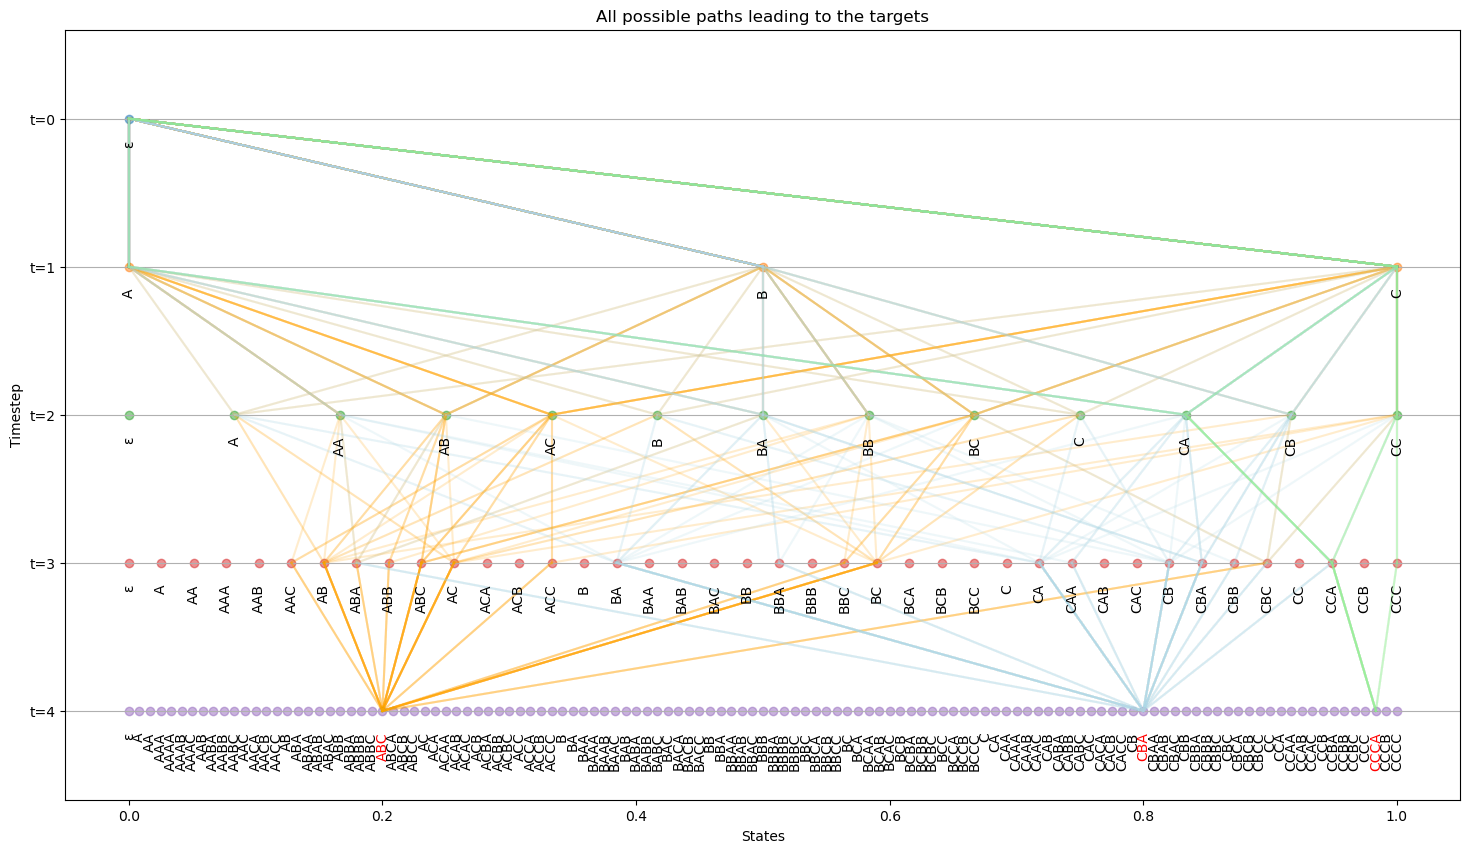

In [17]:
# Define targets, their colors and alpha values
targets = {
    # 'A': {'color': 'black', 'alpha': 0.0},
    'ABC': {'color': 'orange', 'alpha': 0.1},
    'CBA': {'color': 'lightblue', 'alpha': 0.1}, 
    'CCCA': {'color': 'lightgreen', 'alpha': 0.1}
}



# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))
# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        
        # Use red color only for target states at the last timestep
        if state in targets and t == n_timesteps-1:
            plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points',
                        rotation=90, ha='center', va='top', color='red')
        else:
            plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points',
                        rotation=90, ha='center', va='top')




# Find and plot paths to all targets at t=4
def find_paths(t, state, path, target):
    if t == 4 and state == target:
        return [path]
    if t >= 4:
        return []
    paths = []
    next_states = get_next_states(state)
    for next_state in next_states:
        if next_state in all_states[t+1]:
            paths.extend(find_paths(t+1, next_state, path + [(t+1, next_state)], target))
    return paths

# Plot paths for each target
for target, properties in targets.items():
    paths = find_paths(0, '', [(0, '')], target)
    print(f"Number of paths to {target}: {len(paths)}")
    
    # Plot each path
    for path in paths:
        for (t1, s1), (t2, s2) in zip(path, path[1:]):
            y1 = n_timesteps - 1 - t1
            y2 = n_timesteps - 1 - t2
            x1 = np.linspace(0, 1, len(all_states[t1]))[all_states[t1].index(s1)]
            x2 = np.linspace(0, 1, len(all_states[t2]))[all_states[t2].index(s2)]
            plt.plot([x1, x2], [y1, y2], '-', color=properties['color'], alpha=properties['alpha'])

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('All possible paths leading to the targets') 
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# GFN
seq_TBModel

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import random

from torch.distributions.categorical import Categorical
import torch
import torch.nn as nn
from tqdm import tqdm, trange

### utility

In [24]:
# Global constants
alphabet = ['A', 'B', 'C']
n_timesteps = 5  # t=0 to t=4 
vocab_size = len(alphabet) 
max_len = n_timesteps - 1
max_actions = max_len * vocab_size + max_len + max_len * vocab_size


actions_list = []
# Insertions
for pos in range(max_len):
    for char in alphabet:
        actions_list.append(('insert', pos, char))
# Deletions 
for pos in range(max_len):
    actions_list.append(('delete', pos))
# Mutations
for pos in range(max_len):
    for char in alphabet:
        actions_list.append(('mutate', pos, char))

print("Table of actions:")
print(actions_list)
print(len(actions_list))




def set_seed(seed):
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    
    
def calculate_forward_mask_from_state(seq):
    """Here, we mask forward actions to prevent the selection of invalid configurations."""
    mask = np.zeros(max_actions)
    
    # Get current sequence length
    seq_len = len([x for x in seq if x != 'ε'])
    
    # Handle insertions
    if seq_len < max_len:
        for pos in range(seq_len + 1):
            for char_idx, char in enumerate(['A', 'B', 'C']):
                action_idx = pos * vocab_size + char_idx
                mask[action_idx] = 1
                
    # Handle deletions
    deletion_offset = vocab_size * max_len
    if seq_len > 0:
        for pos in range(seq_len):
            mask[deletion_offset + pos] = 1
            
    # Handle mutations
    mutation_offset = deletion_offset + max_len
    for pos in range(seq_len):
        current_char = seq[pos]
        if current_char != 'ε':
            for char_idx, char in enumerate(['A', 'B', 'C']):
                action_idx = mutation_offset + pos * vocab_size + char_idx
                mask[action_idx] = 1

    return torch.Tensor(mask).bool()



def calculate_backward_mask_from_state(timestep, seq):
    """Calculate backward mask considering the timestep and possible parent states.
    
    Args:
        timestep: Current timestep (0-based)
        seq: List of characters representing current sequence
    """
    seq_len = len([c for c in seq if c != 'ε'])  # Current sequence length
    
    mask = [0] * max_actions
    
    # Calculate offsets
    insertion_offset = 0
    deletion_offset = max_len * vocab_size
    mutation_offset = deletion_offset + max_len

    # At t=0, no backward actions possible (root state)
    if timestep == 0:
        return torch.Tensor(mask).bool()
    
    # For any other timestep, max length at previous timestep is (timestep - 1)
    max_prev_len = timestep - 1
    
    # Special case: at t=2 with one character sequence, only mutations allowed
    if timestep == 2 and seq_len == 1:
        # Handle mutations only
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, new_char in enumerate(['A', 'B', 'C']):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1
        return torch.Tensor(mask).bool()
    
    # If current sequence length > max_prev_len, only deletions possible
    if seq_len > max_prev_len:
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
    # If current sequence length == max_prev_len, mutations and deletions possible
    elif seq_len == max_prev_len:
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
        # Handle mutations - any non-empty position could have been mutated
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, new_char in enumerate(['A', 'B', 'C']):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1
                    
    # If current sequence length < max_prev_len, all actions possible
    else:
        # Handle insertions - could have inserted at any position up to current length + 1
        for pos in range(seq_len + 1):
            for char_idx in range(vocab_size):
                mask[insertion_offset + pos * vocab_size + char_idx] = 1
                
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
        # Handle mutations - any non-empty position could have been mutated
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, new_char in enumerate(['A', 'B', 'C']):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1

    return torch.Tensor(mask).bool()



def state_to_tensor(state):
    # Unpack state
    timestep, seq = state
    
    # Create one-hot encoding for timestep
    time_tensor = torch.zeros(n_timesteps)
    time_tensor[timestep] = 1
    
    # Create sequence tensor of shape (max_len, vocab_size + 1 for epsilon) filled with zeros
    seq_tensor = torch.zeros(max_len, vocab_size + 1)
    
    # For each position in the sequence
    for i, char in enumerate(seq):
        if char == 'ε':
            # Last index is for epsilon
            seq_tensor[i, -1] = 1
        else:
            # Convert A->0, B->1, C->2
            char_idx = ord(char) - ord('A')
            seq_tensor[i, char_idx] = 1
            
    # Concatenate time and sequence tensors
    return torch.cat([time_tensor, seq_tensor.flatten()])  # (n_timesteps + max_len * (vocab_size+1))




def perform_action(state, action_idx):

    timestep, sequence = state  # timestep is a dummy variable in this function.
    action = actions_list[action_idx]
    action_type = action[0]
    new_sequence = sequence.copy()
    
    if action_type == 'insert':
        _, insert_pos, char = action
        # Shift elements right starting from insert position
        for i in range(len(sequence)-1, insert_pos, -1):
            new_sequence[i] = new_sequence[i-1]
        new_sequence[insert_pos] = char
        
    elif action_type == 'delete':
        _, del_pos = action
        # Shift elements left starting from delete position
        for i in range(del_pos, len(sequence)-1):
            new_sequence[i] = new_sequence[i+1]
        new_sequence[-1] = 'ε'  # Fill last position with epsilon
        
    else: # mutate
        _, mut_pos, char = action
        new_sequence[mut_pos] = char
        
    return [timestep + 1, new_sequence]



def infer_action_id(current_state, next_state):
    """Infer the action index that led from current_state to next_state"""
    # Try each possible action until we find the one that gives us next_state
    for idx in range(max_actions):
        if perform_action(current_state, idx) == next_state:
            return idx
    raise ValueError("No valid action found between states")



Table of actions:
[('insert', 0, 'A'), ('insert', 0, 'B'), ('insert', 0, 'C'), ('insert', 1, 'A'), ('insert', 1, 'B'), ('insert', 1, 'C'), ('insert', 2, 'A'), ('insert', 2, 'B'), ('insert', 2, 'C'), ('insert', 3, 'A'), ('insert', 3, 'B'), ('insert', 3, 'C'), ('delete', 0), ('delete', 1), ('delete', 2), ('delete', 3), ('mutate', 0, 'A'), ('mutate', 0, 'B'), ('mutate', 0, 'C'), ('mutate', 1, 'A'), ('mutate', 1, 'B'), ('mutate', 1, 'C'), ('mutate', 2, 'A'), ('mutate', 2, 'B'), ('mutate', 2, 'C'), ('mutate', 3, 'A'), ('mutate', 3, 'B'), ('mutate', 3, 'C')]
28


### testing

In [25]:
print("Table of actions:")
print(actions_list)
print(len(actions_list))


# print("\n\n---Testing action mask---")
# state = [3, ['A', 'A', 'C', 'ε']]
# backward_mask = calculate_backward_mask_from_state(state[1], state[0])
# mask_array = backward_mask.numpy()
# available_actions = [action for i, action in enumerate(actions_list) if mask_array[i]]
# print("Full sequence backward mask (t={}): {}".format(state[0], backward_mask))
# print("Available actions based on mask:")
# print(available_actions)
# print(len(available_actions))



# print("\n\n---Testing state_to_tensor function---")
# # Test with different states
# test_states = [
#     [3, ['A', 'A', 'C', 'ε']],
#     [1, ['A', 'ε', 'ε', 'ε']],
#     [0, ['ε', 'ε', 'ε', 'ε']]
# ]

# print("\nMore test cases:")
# for state in test_states:
#     tensor = state_to_tensor(state)
#     print(f"\nInput state: {state}")
#     print(f"Output tensor shape: {tensor.shape}")
#     print(f"Output tensor: {tensor}")



# print("\n\n---Testing perform_action function---")
# # Test a few actions
# test_state = [2, ['C', 'A', 'ε', 'ε']]
# print("Initial state:\n", test_state)

# test_actions = [7] # Try insert, delete and mutate actions
# print("Action:", actions_list[test_actions[0]])
# for action_idx in test_actions:
#     new_state = perform_action(test_state, action_idx)
#     print(new_state)



Table of actions:
[('insert', 0, 'A'), ('insert', 0, 'B'), ('insert', 0, 'C'), ('insert', 1, 'A'), ('insert', 1, 'B'), ('insert', 1, 'C'), ('insert', 2, 'A'), ('insert', 2, 'B'), ('insert', 2, 'C'), ('insert', 3, 'A'), ('insert', 3, 'B'), ('insert', 3, 'C'), ('delete', 0), ('delete', 1), ('delete', 2), ('delete', 3), ('mutate', 0, 'A'), ('mutate', 0, 'B'), ('mutate', 0, 'C'), ('mutate', 1, 'A'), ('mutate', 1, 'B'), ('mutate', 1, 'C'), ('mutate', 2, 'A'), ('mutate', 2, 'B'), ('mutate', 2, 'C'), ('mutate', 3, 'A'), ('mutate', 3, 'B'), ('mutate', 3, 'C')]
28


### GFN implementation

In [26]:
# Fixed hyperparameters.
seed = 43
n_hid_units = 32
n_episodes = 20_000 # 10_000
learning_rate = 3e-3 # 3e-3
r_min = 0.1  # Minimum reward

# temperature = 2  # Temperature parameter for reward sharpness (R(x)^1/T)
# beta = 0.2  # Beta parameter for loss stabilization (T^Beta * Loss)

update_freq = 4
n_actionsteps = n_timesteps - 1
replay_freq = 0.0  # 0.8
uniform_backward = True  # Option to use uniform backward policy


print("For all experiments, our hyperparameters will be:")
print("    + seed={}".format(seed))
print("    + n_hid_units={}".format(n_hid_units))
print("    + n_episodes={}".format(n_episodes))
print("    + learning_rate={}".format(learning_rate))
print("    + r_min={}".format(r_min))
print("    + update_freq={}".format(update_freq))
print("    + n_actionsteps={}".format(n_actionsteps))
print("    + replay_freq={}".format(replay_freq))
print("    + uniform_backward={}".format(uniform_backward))
# print("    + temperature={}".format(temperature))
# print("    + beta={}".format(beta))




"""Reward function"""

# target_sequences = [['C'], ['C', 'A'], ['C', 'B'], ['C', 'C']]
target_sequences = [['A', 'B', 'B', 'C'], 
                    ['A', 'B', 'C', 'ε'], 
                    ['C', 'A', 'C', 'C'], 
                    ['C', 'B', 'A', 'ε'], 
                    ['C', 'C', 'B', 'A'], 
                    ['C', 'C', 'C', 'A']] 

replay_buffer = [
    [([0, ['ε', 'ε', 'ε', 'ε']], 0),
     ([1, ['A', 'ε', 'ε', 'ε']], 2), 
     ([2, ['C', 'A', 'ε', 'ε']], 2),
     ([3, ['C', 'C', 'A', 'ε']], 20),
     ([4, ['C', 'B', 'A', 'ε']], -1),
    ],
    [([0, ['ε', 'ε', 'ε', 'ε']], 0),
     ([1, ['A', 'ε', 'ε', 'ε']], 2),
     ([2, ['C', 'A', 'ε', 'ε']], 2), 
     ([3, ['C', 'C', 'A', 'ε']], 2),
     ([4, ['C', 'C', 'C', 'A']], -1),
    ],
]

def sequence_reward(seq):
    # Check if sequence matches any target sequence
    if seq in target_sequences:
        return 1.0
    return r_min

# def sequence_reward(seq):
#     # Count number of 'A's in sequence
#     num_As = seq.count('A')
#     if num_As > 0:
#         return float(num_As)  # Return number of A's as reward
#     return r_min



"""TB Model""" 

class TBModel(nn.Module):
    def __init__(self, num_hid, uniform_backward=False):
        super().__init__()
        input_size = n_timesteps + max_len * (vocab_size + 1)  # From state_to_tensor output size
        self.uniform_backward = uniform_backward
        self.mlp = nn.Sequential(
            nn.Linear(input_size, num_hid),
            nn.LeakyReLU(),
            nn.Linear(num_hid, max_actions if uniform_backward else 2 * max_actions),  # Only predict P_F if uniform backward
        )
        self.logZ = nn.Parameter(torch.ones(1))  # log Z is just a single number.

    def forward(self, x):
        logits = self.mlp(x)
        if self.uniform_backward:
            P_F = logits
            P_B = torch.zeros_like(P_F)  # Placeholder for uniform policy
        else:
            # Slice the logits into forward and backward policies
            P_F = logits[..., :max_actions]
            P_B = logits[..., max_actions:]

        return P_F, P_B

def trajectory_balance_loss(logZ, log_P_F, log_P_B, reward):
    """Trajectory balance objective converted into mean squared error loss."""
    # Clip log(reward) to -20 to avoid log(0)
    log_reward = torch.log(reward).clamp(min=-20.0)
    loss = (logZ + log_P_F - log_reward - log_P_B).pow(2)
    return loss
  


"""Training"""

set_seed(seed)

model = TBModel(n_hid_units, uniform_backward)
opt = torch.optim.Adam(model.parameters(),  learning_rate)

losses, sampled_states, logZs = [], [], []
minibatch_loss = 0
for episode in tqdm(range(n_episodes), ncols=40):
    state = [0, ['ε'] * max_len]
    P_F, _ = model(state_to_tensor(state))  # starting at t=0
    total_log_P_F, total_log_P_B = 0, 0
    
    # Decide how likely to use replay buffer
    use_replay = np.random.random() < replay_freq   
    if use_replay:
        traj = random.choice(replay_buffer)     
        # traj = replay_buffer[1]
    
    for t in range(n_actionsteps):
        # P_F for current state. 
        mask = calculate_forward_mask_from_state(state[1])  
        P_F = torch.where(mask, P_F, -100)  # Make invalid actions unlikely to be selected. 
        categorical = Categorical(logits=P_F)  # softmax
        if use_replay:
            action_idx = torch.tensor(traj[t][-1])
        else:
            action_idx = categorical.sample()
        total_log_P_F += categorical.log_prob(action_idx)  
        
        # P_B for new_state - uniform if enabled
        new_state = perform_action(state, action_idx)  
        P_F, _ = model(state_to_tensor(new_state))
        if uniform_backward:
            mask = calculate_backward_mask_from_state(new_state[0], new_state[1])
            valid_actions = mask.sum()
            total_log_P_B += -torch.log(valid_actions)  # Uniform probability over valid actions
        else:
            mask = calculate_backward_mask_from_state(new_state[0], new_state[1])
            P_B = torch.where(mask, P_B, -100)  # Make invalid actions unlikely to be selected. 
            total_log_P_B += Categorical(logits=P_B).log_prob(action_idx)   
        
        # print("t:", t)
        # print("state:", state) 
        state = new_state  # Continue iterating.

        if t == n_actionsteps - 1:  # End of trajectory.
            reward = torch.tensor(sequence_reward(state[1])).float()
            # print("t: e", )
            # print("state:", state) 
            # print("reward:", reward)
            # print("--------------------------------")

    # We're done with the trajectory(episode), let's compute its loss. 
    minibatch_loss += trajectory_balance_loss(
        model.logZ,
        total_log_P_F,
        total_log_P_B,
        reward,
    )
    # Take a gradient step, if we are at an update episode.
    sampled_states.append(state)
    if episode % update_freq == 0:
        losses.append(minibatch_loss.item())
        logZs.append(model.logZ.item())
        minibatch_loss.backward()
        opt.step()
        opt.zero_grad()
        minibatch_loss = 0


For all experiments, our hyperparameters will be:
    + seed=43
    + n_hid_units=32
    + n_episodes=20000
    + learning_rate=0.003
    + r_min=0.1
    + update_freq=4
    + n_actionsteps=4
    + replay_freq=0.0
    + uniform_backward=True


100%|█| 20000/20000 [00:37<00:00, 538.92


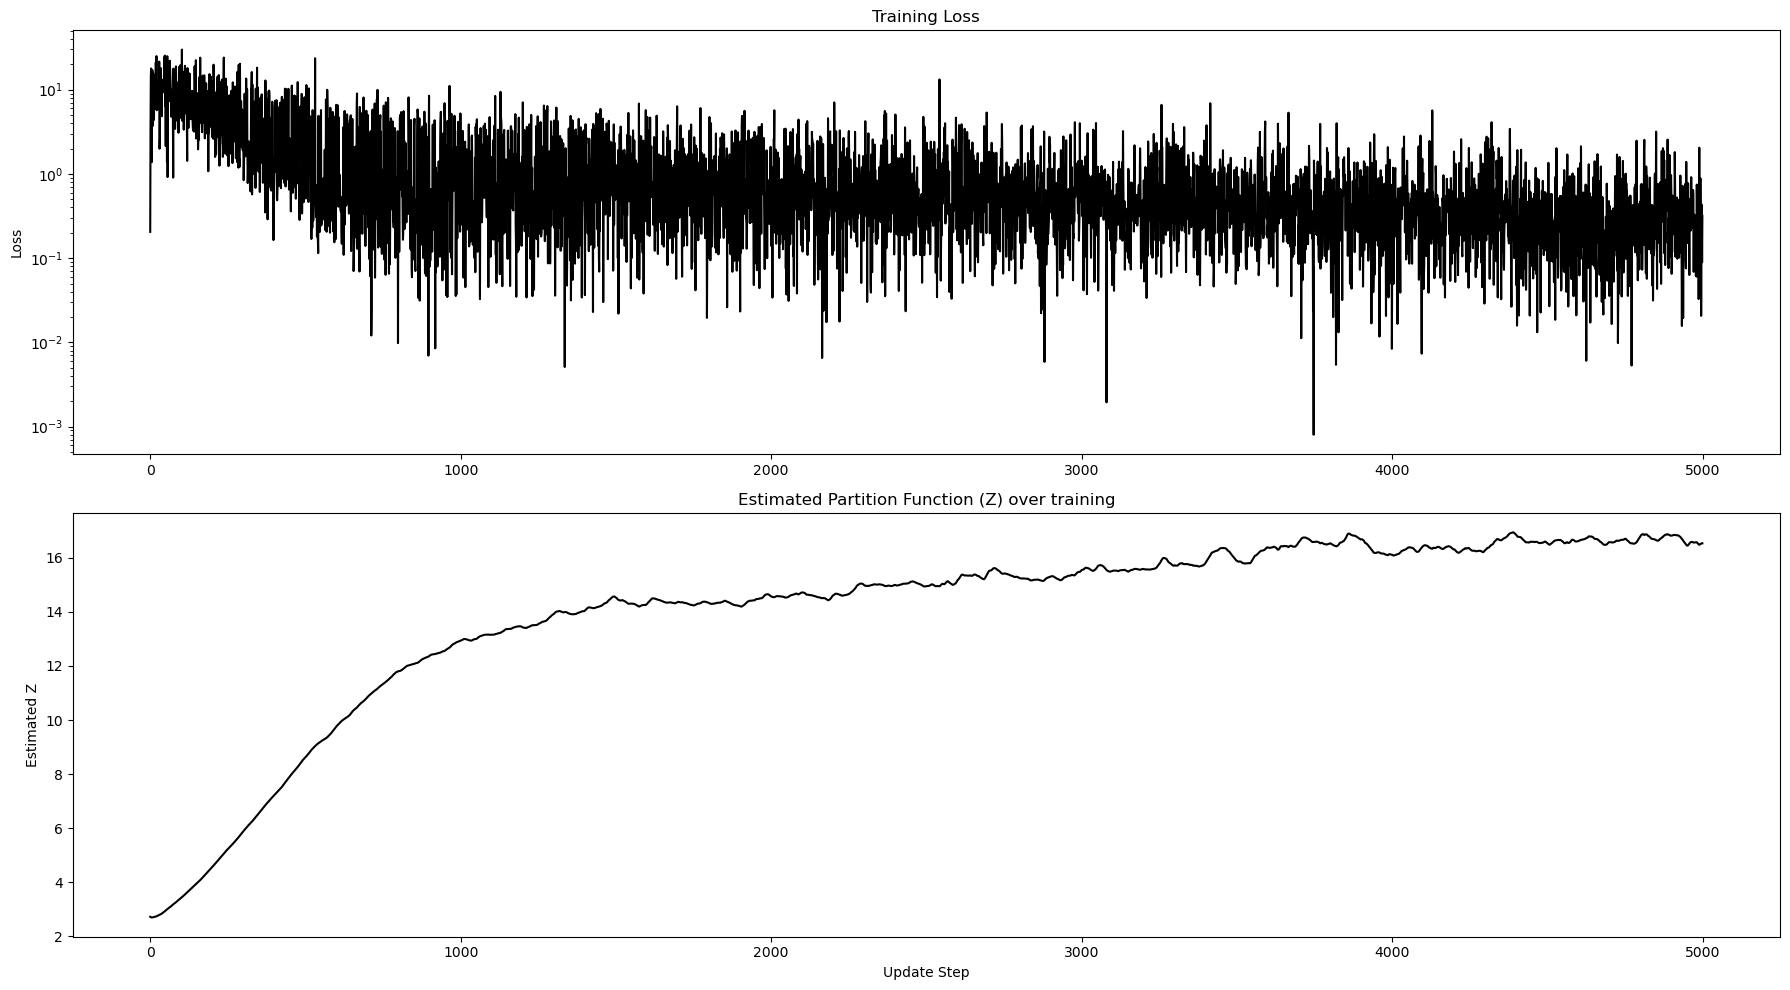


The final Z (partition function) estimate is 16.54

Reward Distribution of 20000 sampled states:
Reward 0.1: 80.90%
Reward 1.0: 19.10%


In [27]:
# Plot the loss and Z plots
fig, ax = plt.subplots(2, 1, figsize=(18, 10))
plt.sca(ax[0])
plt.plot(losses, color="black")
plt.yscale('log')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.sca(ax[1])
plt.plot(np.exp(logZs), color="black")
plt.ylabel('Estimated Z')
plt.xlabel('Update Step')
plt.title('Estimated Partition Function (Z) over training')

plt.tight_layout()
plt.show()

print(f"\nThe final Z (partition function) estimate is {np.exp(logZs[-1]):.2f}")



# Print reward distribution from sampled states
rewards = [sequence_reward(state[1]) for state in sampled_states]
unique_rewards, counts = np.unique(rewards, return_counts=True)
percentages = counts / len(rewards) * 100
print("\nReward Distribution of {} sampled states:".format(len(sampled_states)))
for reward, percentage in zip(unique_rewards, percentages):
    print(f"Reward {reward}: {percentage:.2f}%")
    


In [30]:
sampled_states[-50:]


[[4, ['B', 'C', 'A', 'B']],
 [4, ['C', 'A', 'C', 'C']],
 [4, ['A', 'A', 'C', 'C']],
 [4, ['A', 'B', 'C', 'ε']],
 [4, ['C', 'A', 'B', 'B']],
 [4, ['C', 'C', 'B', 'A']],
 [4, ['A', 'A', 'B', 'C']],
 [4, ['C', 'A', 'C', 'C']],
 [4, ['A', 'B', 'B', 'C']],
 [4, ['A', 'A', 'C', 'A']],
 [4, ['B', 'C', 'C', 'A']],
 [4, ['C', 'C', 'B', 'A']],
 [4, ['C', 'C', 'C', 'ε']],
 [4, ['C', 'B', 'C', 'ε']],
 [4, ['B', 'B', 'A', 'A']],
 [4, ['B', 'B', 'C', 'A']],
 [4, ['C', 'A', 'B', 'C']],
 [4, ['B', 'B', 'C', 'B']],
 [4, ['A', 'B', 'C', 'ε']],
 [4, ['B', 'C', 'C', 'B']],
 [4, ['A', 'B', 'B', 'C']],
 [4, ['A', 'B', 'B', 'B']],
 [4, ['C', 'C', 'B', 'A']],
 [4, ['B', 'B', 'A', 'ε']],
 [4, ['A', 'B', 'ε', 'ε']],
 [4, ['A', 'B', 'B', 'C']],
 [4, ['C', 'B', 'A', 'B']],
 [4, ['C', 'C', 'B', 'A']],
 [4, ['C', 'C', 'ε', 'ε']],
 [4, ['A', 'B', 'B', 'C']],
 [4, ['A', 'B', 'B', 'C']],
 [4, ['A', 'B', 'C', 'ε']],
 [4, ['A', 'A', 'B', 'A']],
 [4, ['B', 'A', 'ε', 'ε']],
 [4, ['C', 'B', 'B', 'ε']],
 [4, ['A', 'B', 'B',

In [31]:
# Create a test state and see what policy the model predicts
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [3, ['C', 'C', 'A', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax


# Print the predicted probabilities for each action
print("\nFor state", test_state)
print("Model predicts these action probabilities:")
for action, prob in zip(actions_list, probs):
    print(f"{action}: {prob:.3f}")



For state [3, ['C', 'C', 'A', 'ε']]
Model predicts these action probabilities:
('insert', 0, 'A'): 0.016
('insert', 0, 'B'): 0.021
('insert', 0, 'C'): 0.171
('insert', 1, 'A'): 0.011
('insert', 1, 'B'): 0.019
('insert', 1, 'C'): 0.187
('insert', 2, 'A'): 0.017
('insert', 2, 'B'): 0.195
('insert', 2, 'C'): 0.183
('insert', 3, 'A'): 0.023
('insert', 3, 'B'): 0.017
('insert', 3, 'C'): 0.024
('delete', 0): 0.003
('delete', 1): 0.004
('delete', 2): 0.004
('delete', 3): 0.000
('mutate', 0, 'A'): 0.006
('mutate', 0, 'B'): 0.006
('mutate', 0, 'C'): 0.006
('mutate', 1, 'A'): 0.004
('mutate', 1, 'B'): 0.060
('mutate', 1, 'C'): 0.006
('mutate', 2, 'A'): 0.007
('mutate', 2, 'B'): 0.005
('mutate', 2, 'C'): 0.004
('mutate', 3, 'A'): 0.000
('mutate', 3, 'B'): 0.000
('mutate', 3, 'C'): 0.000


# Generate most likely trajectory (based on unmerged P_F)

In [33]:
# Start from root state and follow highest probability actions (unmerged actions where multiple actions can lead to the same state) 
current_state = [0, ['ε'] * max_len]  # Root state
trajectory = [current_state]

print("\nGenerating most likely trajectory from root:")
print(f"Starting state: {current_state}")

for t in range(max_len):
    # Convert current state to tensor
    state_tensor = state_to_tensor(current_state)
    
    # Get model predictions
    with torch.no_grad():
        P_F, P_B = model(state_tensor)
        mask = calculate_forward_mask_from_state(current_state[1])
        P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
        probs = Categorical(logits=P_F).probs
    
    # Get highest probability action
    best_action_idx = torch.argmax(probs).item()
    best_prob = probs[best_action_idx].item()
    
    print(f"\nAt t={t}:")
    print(f"Chosen action: {actions_list[best_action_idx]} (probability: {best_prob:.3f})")
    
    # Apply the action using perform_action function
    current_state = perform_action(current_state, best_action_idx)
    trajectory.append(current_state)
    print(f"New state: {current_state}")

print("\nFull trajectory:")
for t, state in enumerate(trajectory):
    print(f"t={t}: {state}")



Generating most likely trajectory from root:
Starting state: [0, ['ε', 'ε', 'ε', 'ε']]

At t=0:
Chosen action: ('insert', 0, 'C') (probability: 0.374)
New state: [1, ['C', 'ε', 'ε', 'ε']]

At t=1:
Chosen action: ('insert', 1, 'C') (probability: 0.183)
New state: [2, ['C', 'C', 'ε', 'ε']]

At t=2:
Chosen action: ('insert', 2, 'A') (probability: 0.165)
New state: [3, ['C', 'C', 'A', 'ε']]

At t=3:
Chosen action: ('insert', 2, 'B') (probability: 0.195)
New state: [4, ['C', 'C', 'B', 'A']]

Full trajectory:
t=0: [0, ['ε', 'ε', 'ε', 'ε']]
t=1: [1, ['C', 'ε', 'ε', 'ε']]
t=2: [2, ['C', 'C', 'ε', 'ε']]
t=3: [3, ['C', 'C', 'A', 'ε']]
t=4: [4, ['C', 'C', 'B', 'A']]



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

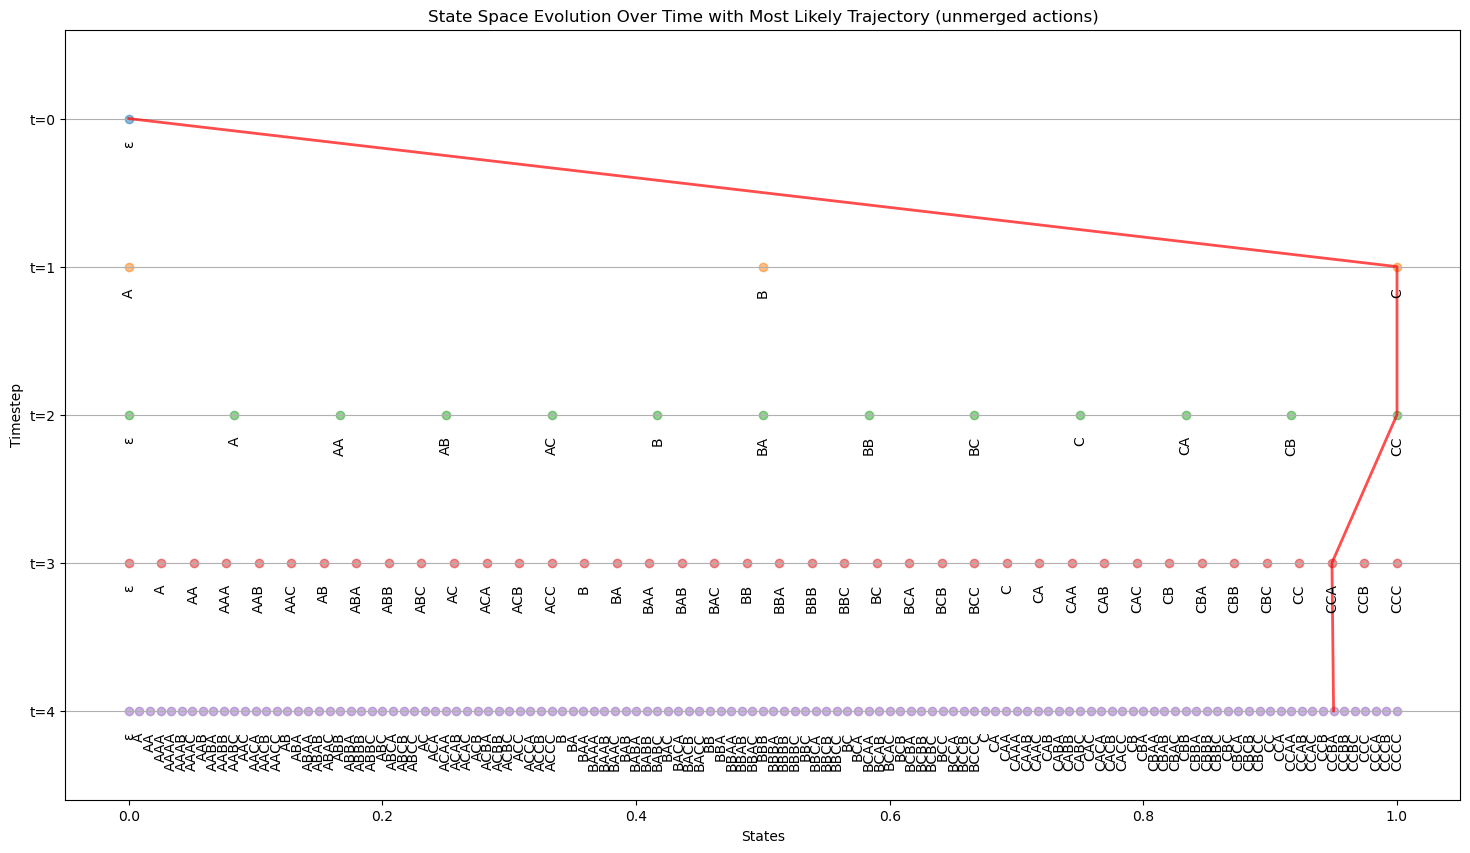

In [34]:
# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Plot each state as a point and store coordinates
state_coords = {}  # Dictionary to store coordinates for each state
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels and store coordinates
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top')
        state_coords[(t, label)] = (x, y)

# Plot trajectory
trajectory_coords = []
for t, state in enumerate(trajectory):
    # Convert state list to string representation
    state_str = ''.join(s for s in state[1] if s != 'ε')
    state_str = state_str if state_str else 'ε'
    
    if (t, state_str) in state_coords:
        trajectory_coords.append(state_coords[(t, state_str)])

# Connect trajectory points with lines
if trajectory_coords:
    trajectory_coords = np.array(trajectory_coords)
    plt.plot(trajectory_coords[:, 0], trajectory_coords[:, 1], 'r-', linewidth=2, alpha=0.7)

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('State Space Evolution Over Time with Most Likely Trajectory (unmerged actions)')
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])


# Visualize the flow 

In [35]:
# Create a test state and see what policy the model predicts
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [3, ['A', 'A', 'A', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax


# Print the predicted probabilities for each action
print("\nFor state", test_state)
print("Model predicts these action probabilities:")
for action, prob in zip(actions_list, probs):
    print(f"{action}: {prob:.3f}")



For state [3, ['A', 'A', 'A', 'ε']]
Model predicts these action probabilities:
('insert', 0, 'A'): 0.052
('insert', 0, 'B'): 0.067
('insert', 0, 'C'): 0.036
('insert', 1, 'A'): 0.076
('insert', 1, 'B'): 0.050
('insert', 1, 'C'): 0.052
('insert', 2, 'A'): 0.080
('insert', 2, 'B'): 0.059
('insert', 2, 'C'): 0.067
('insert', 3, 'A'): 0.076
('insert', 3, 'B'): 0.065
('insert', 3, 'C'): 0.074
('delete', 0): 0.010
('delete', 1): 0.016
('delete', 2): 0.010
('delete', 3): 0.000
('mutate', 0, 'A'): 0.015
('mutate', 0, 'B'): 0.020
('mutate', 0, 'C'): 0.035
('mutate', 1, 'A'): 0.016
('mutate', 1, 'B'): 0.044
('mutate', 1, 'C'): 0.022
('mutate', 2, 'A'): 0.017
('mutate', 2, 'B'): 0.018
('mutate', 2, 'C'): 0.024
('mutate', 3, 'A'): 0.000
('mutate', 3, 'B'): 0.000
('mutate', 3, 'C'): 0.000


In [36]:
# print Unpadded state and Merged actions
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [2, ['A', 'A', 'ε', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)
print("test_state:", test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax

print("actions_list:", len(actions_list))
print("probs:", len(probs))

# Create dictionary to store next states and their combined probabilities
next_state_probs = {}

# First pass - collect all next states and their probabilities
print("\nPossible next states for each action:")
for action_idx, (action, prob) in enumerate(zip(actions_list, probs)):
    if prob > 0.01:  # Only show probabilities > 1/100
        next_state = perform_action(test_state, action_idx)
        # Convert next_state to string for dictionary key
        next_state_str = str(next_state)
        
        if next_state_str not in next_state_probs:
            next_state_probs[next_state_str] = {'state': next_state, 'prob': prob, 'actions': [action]}
        else:
            next_state_probs[next_state_str]['prob'] += prob
            next_state_probs[next_state_str]['actions'].append(action)

# Second pass - print combined results
for state_info in next_state_probs.values():
    actions_str = ' + '.join([f"Action {action}" for action in state_info['actions']])
    print(f"\n{actions_str} (prob: {state_info['prob']:.3f}):")
    print(f"Padded state: {[s for s in state_info['state']]}")
    unpadded_seq = ''.join(s for s in state_info['state'][1] if s != '' and s != 'ε')
    print(f"Unpadded state: [{state_info['state'][0]}, '{unpadded_seq}']")


test_state: [2, ['A', 'A', 'ε', 'ε']]
actions_list: 28
probs: 28

Possible next states for each action:

Action ('insert', 0, 'A') + Action ('insert', 1, 'A') + Action ('insert', 2, 'A') (prob: 0.257):
Padded state: [3, ['A', 'A', 'A', 'ε']]
Unpadded state: [3, 'AAA']

Action ('insert', 0, 'B') (prob: 0.092):
Padded state: [3, ['B', 'A', 'A', 'ε']]
Unpadded state: [3, 'BAA']

Action ('insert', 0, 'C') (prob: 0.113):
Padded state: [3, ['C', 'A', 'A', 'ε']]
Unpadded state: [3, 'CAA']

Action ('insert', 1, 'B') (prob: 0.150):
Padded state: [3, ['A', 'B', 'A', 'ε']]
Unpadded state: [3, 'ABA']

Action ('insert', 1, 'C') (prob: 0.114):
Padded state: [3, ['A', 'C', 'A', 'ε']]
Unpadded state: [3, 'ACA']

Action ('insert', 2, 'B') (prob: 0.076):
Padded state: [3, ['A', 'A', 'B', 'ε']]
Unpadded state: [3, 'AAB']

Action ('insert', 2, 'C') (prob: 0.121):
Padded state: [3, ['A', 'A', 'C', 'ε']]
Unpadded state: [3, 'AAC']

Action ('mutate', 0, 'B') (prob: 0.012):
Padded state: [3, ['B', 'A', 'ε', '

In [37]:
# Initialize edges list to store all transitions and their probabilities
edges = []
prob_threshold = 0.0001  # filter out tiny probability actions

# Start with the root state
root_state = [0, ['ε', 'ε', 'ε', 'ε']]
states_by_time = {0: [root_state]}

# Iterate through timesteps
for t in range(4):  # Go up to t=3 to get edges to t=4
    next_states = {}  # Dictionary to store next states for t+1
    
    # For each state at current timestep
    for curr_state in states_by_time[t]:
        # Convert state to tensor and get model predictions
        curr_state_tensor = state_to_tensor(curr_state)
        with torch.no_grad():
            P_F, P_B = model(curr_state_tensor)
            mask = calculate_forward_mask_from_state(curr_state[1])
            P_F = torch.where(mask, P_F, -100)
            probs = Categorical(logits=P_F).probs

        # Dictionary to store next states and accumulate their probabilities
        next_state_probs = {}

        # Get all possible next states and their probabilities
        for action_idx, (action, prob) in enumerate(zip(actions_list, probs)):
            # Only consider actions with probability above threshold
            if prob > prob_threshold:
                next_state = perform_action(curr_state, action_idx)
                next_state_str = str(next_state)
                
                # Get unpadded versions
                unpadded_curr = ''.join(s for s in curr_state[1] if s != '' and s != 'ε')
                unpadded_next = ''.join(s for s in next_state[1] if s != '' and s != 'ε')
                
                # Create key for the transition
                transition_key = (tuple([curr_state[0], unpadded_curr]), 
                                tuple([next_state[0], unpadded_next]))
                
                # Accumulate probabilities for same transitions
                if transition_key not in next_state_probs:
                    next_state_probs[transition_key] = {'prob': prob, 'state': next_state}
                else:
                    next_state_probs[transition_key]['prob'] += prob

                # Store next state for next iteration
                if next_state_str not in next_states:
                    next_states[next_state_str] = next_state

        # Add accumulated transitions to edges
        for transition_key, info in next_state_probs.items():
            edges.append([list(transition_key[0]), list(transition_key[1]), float(info['prob'])])

    # Store all unique next states for next timestep
    states_by_time[t + 1] = list(next_states.values())

# Print all edges
print("All edges (source_state, target_state, probability):")
for edge in edges:
    print(f"{edge[0]}, {edge[1]}, {edge[2]:.3f}")


All edges (source_state, target_state, probability):
[0, ''], [1, 'A'], 0.315
[0, ''], [1, 'B'], 0.311
[0, ''], [1, 'C'], 0.374
[1, 'A'], [2, 'AA'], 0.246
[1, 'A'], [2, 'BA'], 0.154
[1, 'A'], [2, 'CA'], 0.223
[1, 'A'], [2, 'AB'], 0.166
[1, 'A'], [2, 'AC'], 0.189
[1, 'A'], [2, ''], 0.001
[1, 'A'], [2, 'A'], 0.005
[1, 'A'], [2, 'B'], 0.009
[1, 'A'], [2, 'C'], 0.007
[1, 'B'], [2, 'AB'], 0.164
[1, 'B'], [2, 'BB'], 0.303
[1, 'B'], [2, 'CB'], 0.177
[1, 'B'], [2, 'BA'], 0.151
[1, 'B'], [2, 'BC'], 0.170
[1, 'B'], [2, ''], 0.003
[1, 'B'], [2, 'A'], 0.008
[1, 'B'], [2, 'B'], 0.012
[1, 'B'], [2, 'C'], 0.011
[1, 'C'], [2, 'AC'], 0.146
[1, 'C'], [2, 'BC'], 0.149
[1, 'C'], [2, 'CC'], 0.363
[1, 'C'], [2, 'CA'], 0.180
[1, 'C'], [2, 'CB'], 0.136
[1, 'C'], [2, ''], 0.001
[1, 'C'], [2, 'A'], 0.008
[1, 'C'], [2, 'B'], 0.010
[1, 'C'], [2, 'C'], 0.006
[2, 'AA'], [3, 'AAA'], 0.257
[2, 'AA'], [3, 'BAA'], 0.092
[2, 'AA'], [3, 'CAA'], 0.113
[2, 'AA'], [3, 'ABA'], 0.150
[2, 'AA'], [3, 'ACA'], 0.114
[2, 'AA'], [3

In [38]:
print("len(edges):", len(edges))


len(edges): 831



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

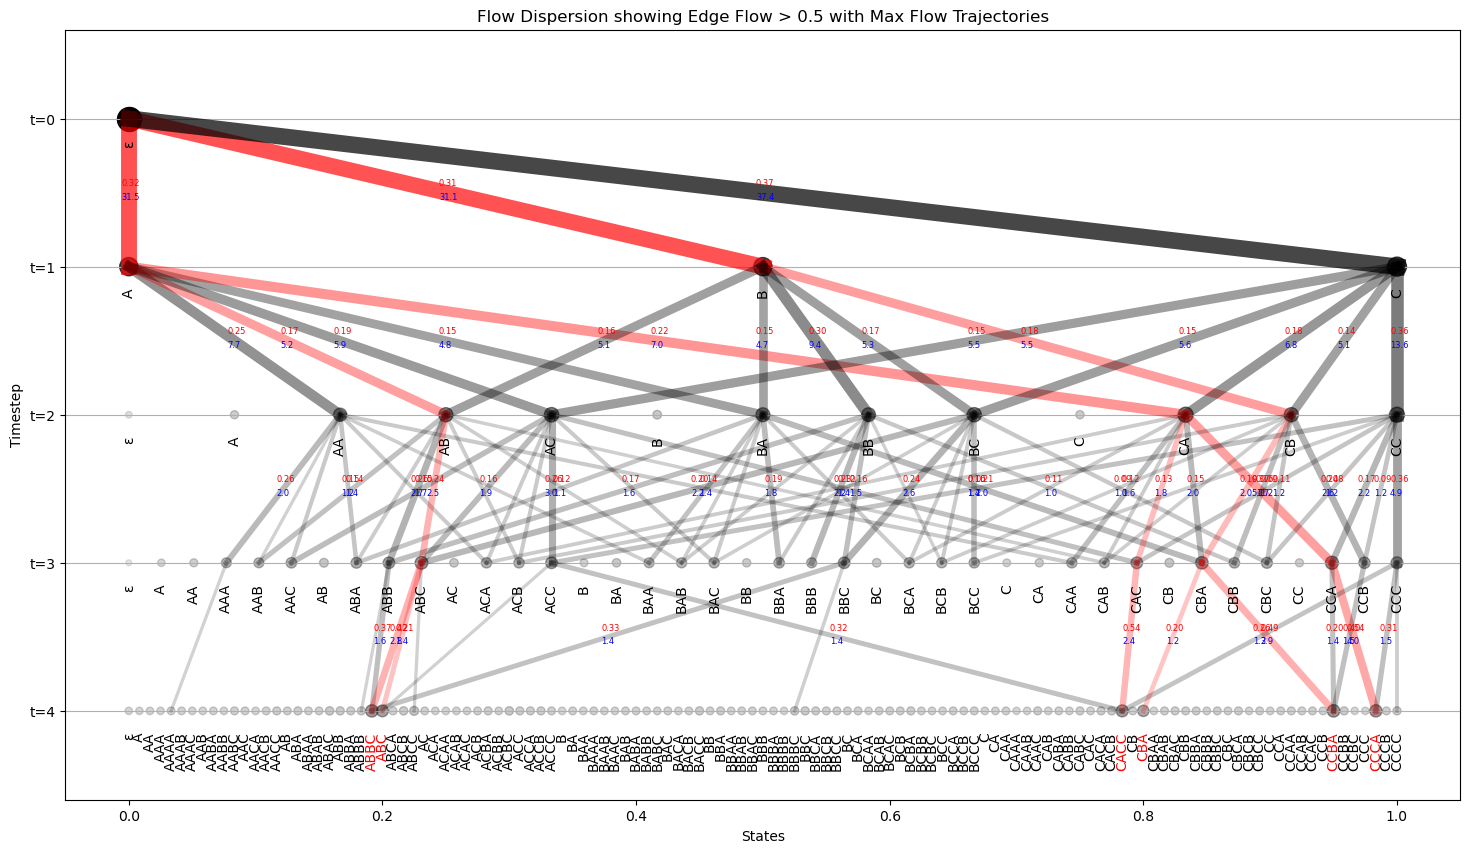

In [39]:
edge_labels = edges
edge_flow_label_threshold = 1.0  # Only show labels for edges with flow > threshold
edge_flow_threshold = 0.5  # Only show edges with flow > threshold
show_edge_labels = True  # Flag to control edge label visibility
show_target_trajectory = True  # Flag to control if we show target sequence trajectory

# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Convert target sequences to unpadded strings for comparison
target_unpadded = [''.join(s for s in seq if s != 'ε') for seq in target_sequences]

# Calculate flows through the network
initial_flow = 100  # Starting flow at root
node_flows = {(0,''): initial_flow}  # Dictionary to store flow at each node

# Calculate flows for each node based on edge probabilities
for source, target, prob in edge_labels:
    t1, state1 = source
    if (t1, state1 if state1 else '') in node_flows:
        current_flow = node_flows[(t1, state1 if state1 else '')]
        edge_flow = current_flow * prob
        t2, state2 = target
        if (t2, state2 if state2 else '') not in node_flows:
            node_flows[(t2, state2 if state2 else '')] = 0
        node_flows[(t2, state2 if state2 else '')] += edge_flow

trajectories = []
if show_target_trajectory:
    # Find trajectory for each target sequence
    for target_seq in target_unpadded:
        trajectory = [(n_timesteps-1, target_seq)]
        current_time = n_timesteps-1
        current_state = target_seq
        
        while current_time > 0:
            max_flow = 0
            best_prev_state = None
            # Find edge with maximum flow leading to current state
            for source, target, prob in edge_labels:
                t1, state1 = source
                t2, state2 = target
                if t2 == current_time and state2 == current_state:
                    source_flow = node_flows.get((t1, state1 if state1 else ''), 0)
                    edge_flow = source_flow * prob
                    if edge_flow > max_flow:
                        max_flow = edge_flow
                        best_prev_state = state1
            if best_prev_state is not None:
                current_time -= 1
                current_state = best_prev_state
                trajectory.append((current_time, current_state))
        # make trajectory in reverse order
        trajectories.append(trajectory[::-1])




"""Plotting"""
# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    # Calculate point sizes and colors based on node flows
    sizes = []
    colors = []
    for state in states:
        flow = node_flows.get((t, state if state else ''), 0)
        # Scale the size based on flow, using square root to prevent extremely large points
        # Minimum size of 10, maximum of 300
        size = 10 + np.sqrt(flow / initial_flow) * 290
        sizes.append(size)
        
        # Calculate color intensity based on flow
        color_intensity = np.cbrt(flow / initial_flow)
        # Ensure minimum color intensity of 0.1 while keeping maximum at 1
        color_intensity = min(1, max(0.1, color_intensity))
        colors.append((0, 0, 0, color_intensity))  # Black with scaled alpha
    
    # Plot points with varying sizes and colors
    plt.scatter(x_positions, [y] * len(states), c=colors, s=sizes)
    
    # Add state labels (always shown)
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        # Color the label red only at final timestep
        color = 'red' if (t == n_timesteps - 1 and state in target_unpadded) else 'black'
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top', color=color)

# Draw edges between states with flow-based coloring
for source, target, prob in edge_labels:
    t1, state1 = source
    t2, state2 = target
    
    # Calculate flow for this edge
    source_flow = node_flows.get((t1, state1 if state1 else ''), 0)
    edge_flow = source_flow * prob
    
    # Only draw edges with flow above threshold
    if edge_flow > edge_flow_threshold:
        # Find x positions for both states
        y1 = n_timesteps - 1 - t1
        y2 = n_timesteps - 1 - t2
        
        try:
            # Find indices of states in their respective timesteps
            x1_idx = all_states[t1].index(state1 if state1 else '')
            x2_idx = all_states[t2].index(state2 if state2 else '')
            
            # Calculate actual x positions
            x1 = np.linspace(0, 1, len(all_states[t1]))[x1_idx]
            x2 = np.linspace(0, 1, len(all_states[t2]))[x2_idx]
            
            # Calculate color intensity based on flow (normalized by initial flow)
            # Use cube root scaling to better distinguish small values
            color_intensity = np.cbrt(edge_flow / initial_flow)
            # Ensure minimum visibility while keeping maximum at 1
            color_intensity = min(1, max(0.1, color_intensity))
            
            # Check if this edge is part of any trajectory
            is_trajectory_edge = False
            if show_target_trajectory:
                for trajectory in trajectories:
                    for i in range(len(trajectory)-1):
                        if (t1, state1) == trajectory[i] and (t2, state2) == trajectory[i+1]:
                            is_trajectory_edge = True
                            break
                    if is_trajectory_edge:
                        break
                        
            # Use red for trajectory edges, black for others
            edge_color = (1, 0, 0, color_intensity) if is_trajectory_edge else (0, 0, 0, color_intensity)
            # Draw edge with flow-based width that better distinguishes small values
            # Use log scaling with larger multiplier to spread out small values more dramatically
            width = 1 + 3 * np.log1p(100 * edge_flow / initial_flow)
            plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=width)
            
            # Add probability and flow labels only if flow exceeds threshold
            if show_edge_labels and edge_flow > edge_flow_label_threshold:
                mid_x = x1 + (x2 - x1) * 0.5
                mid_y = y1 + (y2 - y1) * 0.5
                # Split probability and flow into separate annotations with different colors
                plt.annotate(f'{prob:.2f}', (mid_x, mid_y),
                            xytext=(-5, 5), textcoords='offset points', fontsize=6,
                            color='red')  # Probability in red
                plt.annotate(f'{edge_flow:.1f}', (mid_x, mid_y),
                            xytext=(-5, -5), textcoords='offset points', fontsize=6,
                            color='blue')  # Flow in blue
        except ValueError:
            print(f"Warning: Could not find state {state1} at t={t1} or state {state2} at t={t2}")
        
        

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
title = 'Flow Dispersion showing Edge Flow > {}'.format(edge_flow_threshold)
if show_target_trajectory:
    title += ' with Max Flow Trajectories'
plt.title(title)
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])

# Print all trajectories if enabled
if show_target_trajectory:
    print("\nMax flow trajectories:")
    for i, trajectory in enumerate(trajectories):
        print(f"\nTrajectory for target {target_unpadded[i]}:")
        for t, state in trajectory:
            print(f"t={t}: {state if state else 'ε'}")


In [40]:

trajectories

[[(0, ''), (1, 'A'), (2, 'AB'), (3, 'ABC'), (4, 'ABBC')],
 [(0, ''), (1, 'A'), (2, 'AB'), (3, 'ABC'), (4, 'ABC')],
 [(0, ''), (1, 'A'), (2, 'CA'), (3, 'CAC'), (4, 'CACC')],
 [(0, ''), (1, 'B'), (2, 'CB'), (3, 'CBA'), (4, 'CBA')],
 [(0, ''), (1, 'B'), (2, 'CB'), (3, 'CBA'), (4, 'CCBA')],
 [(0, ''), (1, 'A'), (2, 'CA'), (3, 'CCA'), (4, 'CCCA')]]

In [41]:
"""new: partial reward signal"""

def getAlignmentScore(candidate_sequence, target_sequence, match_score, mismatch_score, gap_score):
    cell_scores = {(-1,-1): 0}
    for i in range(len(candidate_sequence)):
        cell_scores[(i, -1)] = (i+1)*gap_score
    for j in range(len(target_sequence)):
        cell_scores[(-1, j)] = (j+1)*gap_score
    for i in range(len(candidate_sequence)):
        for j in range(len(target_sequence)):
            cell_scores[(i, j)] = max( \
                cell_scores[(i-1, j-1)] + (match_score if candidate_sequence[i]==target_sequence[j] else mismatch_score), \
                cell_scores[(i-1, j)] + gap_score, \
                cell_scores[(i, j-1)] + gap_score)
    maximum_possible_score = match_score * len(target_sequence)
    return cell_scores[(len(candidate_sequence)-1, len(target_sequence)-1)] / maximum_possible_score

def getMultipleAlignmentScore(candidate_sequence, target_sequences, match_score=1, mismatch_score=-1, gap_score=-1):
    alignment_scores = [getAlignmentScore(candidate_sequence, target_sequence,  match_score, mismatch_score, gap_score) for target_sequence in target_sequences]
    print(f'Individual scores: {alignment_scores}')
    return max(alignment_scores)

# EXAMPLE USAGE
target_sequences = ['TCGGGA', 'GTTTGATA', 'GCC', 'GGGA']
candidate_sequence = 'GGGA'
score = getMultipleAlignmentScore(candidate_sequence, target_sequences)
print(f'Final score: {score}')

'new: partial reward signal'